# Debug detsim city NB - Kr data

### JAH 12/12/19

In [1]:
import time

%load_ext autoreload
%autoreload 2

import numpy             as np
import scipy             as sc
import scipy.stats       as st
import tables            as tb

from typing    import Callable
from typing    import Tuple
from typing    import List

import invisible_cities.io.mcinfo_io               as mcio
import invisible_cities.core    .system_of_units_c as system_of_units
import invisible_cities.core    .fit_functions     as fitf
import invisible_cities.database.load_db           as db

from   invisible_cities.reco.corrections_new import read_maps

import myhistos                            as ht
import detsim.simulation.detsim_functions  as ds
import detsim.simulation.detsim_plots      as dsplot

units = system_of_units.SystemOfUnits()

# Plotting configuration

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
np.warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"]          = 5, 4
plt.rcParams["font.size"]               = 12
plt.rcParams["figure.max_open_warning"] = 100

## DetSim

In [3]:
detector, run_number = 'new', -1
krmap_filename = '/Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/MC_NEW_Kr_map.h5'
psfsipm_filename = '/Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/PSF_SiPM_dst_sum_collapsed.h5'
dsim = ds.DetSimParameters(detector, run_number, krmap_filename, psfsipm_filename)

load psf pmt  from file :  /Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/MC_NEW_Kr_map.h5
load psf sipm from file :  /Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/PSF_SiPM_dst_sum_collapsed.h5


In [4]:
simulate_electrons_ = ds.get_function_simulate_electrons(dsim)
simulate_pes_       = ds.get_function_simulate_pes(dsim)
simulate_wfs_       = ds.get_function_simulate_wfs(dsim)

## Data

In [5]:
#datadir      = '/Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/'
#datafilename = 'neut_full_test.sim.h5'

datadir      = '/Users/hernando/investigacion/NEXT/data/MC/'
datafilename = 'Kr_full_test.sim.h5'

In [6]:
def hits_generator(datafname):
    datahits = mcio.load_mchits_df(datafname)
    hitsgroup = datahits.groupby('event_id')
    print('size ', len(hitsgroup))
    for ievt, hitsdf in hitsgroup:
        print('event ', ievt)
        yield(ievt, hitsdf)

In [7]:
it = hits_generator(datadir + datafilename)

In [8]:
evt, hits = next(it)

size  100
event  0


## Generate - drift - diffuse electrons

total energy  41.543297469615936  keV
number of diffused electrons  1768
longitudinal diffusion  1.5225948222400991
transverse diffusion 5.075316074133664


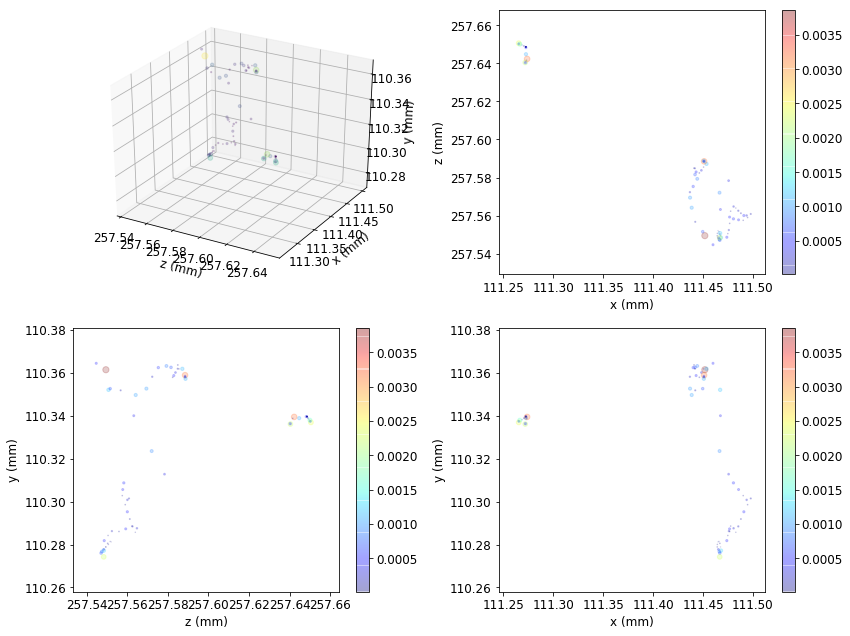

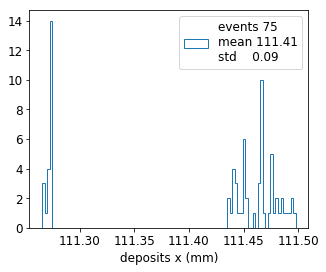

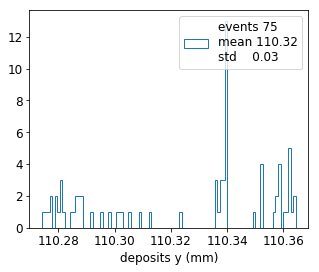

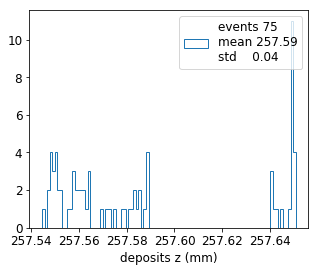

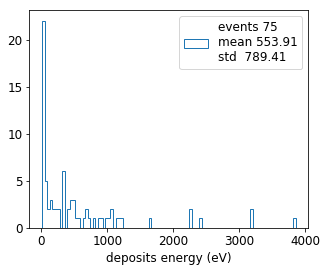

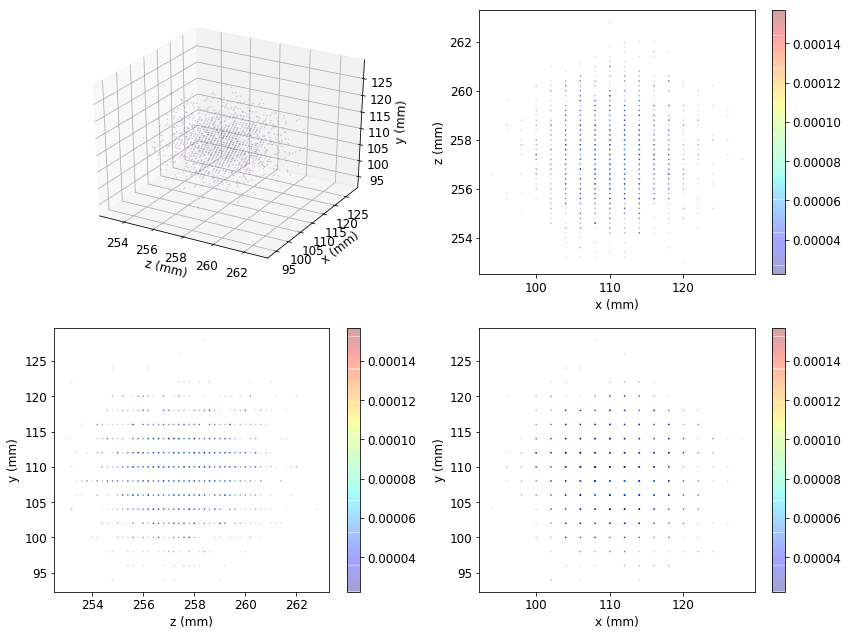

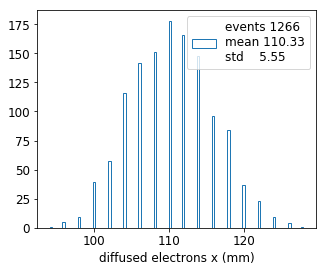

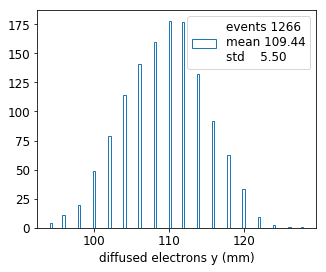

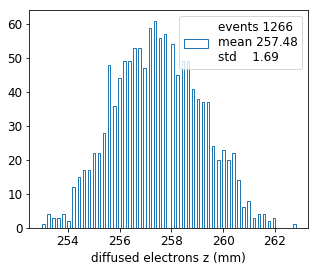

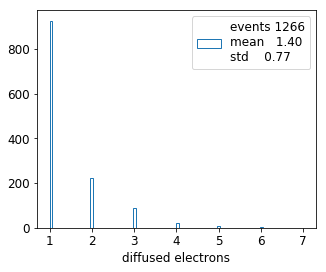

In [9]:
posenes, posdnes = simulate_electrons_(hits)
dsplot.plot_simulate_electrons(dsim, posenes, posdnes)

number of S1 photons 692
number of S2 photons 1768090.534980532
total pes_s1 4
pes_S1  [0 1 1 0 0 0 0 1 0 0 0 1]
total pes_pmts 10877
pes_pmts  [882 929 941 895 934 859 899 892 919 905 903 919]
pes_sipms  [0 0 0 ... 0 0 0]
total pes_sipms 1095


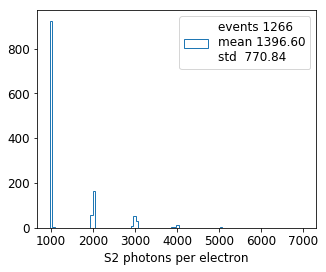

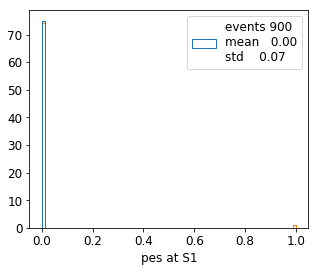

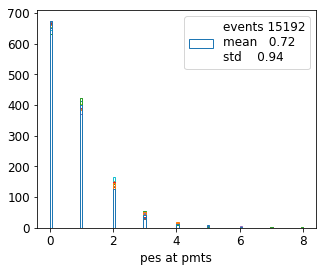

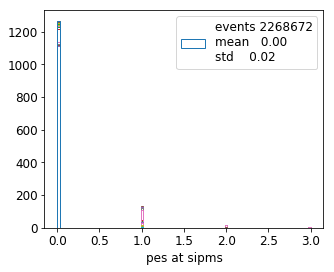

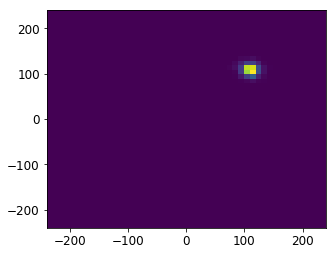

In [10]:
s1pes, s2pes = simulate_pes_(posenes, posdnes)
dsplot.plot_simulate_pes(dsim, s1pes, s2pes)

total adcs pmts  269168.1469
total adcs sipms 16991.216


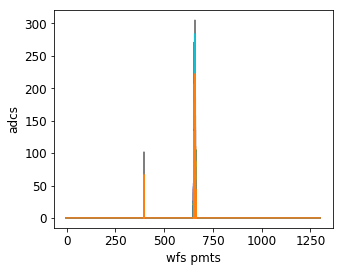

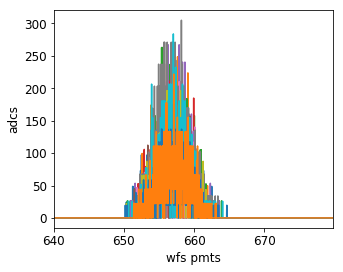

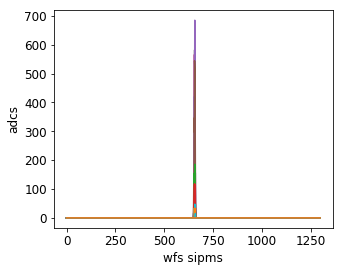

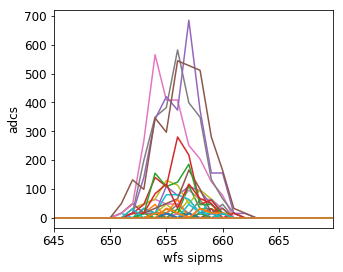

In [11]:
wfs_pmts, wfs_sipms = simulate_wfs_(s1pes, s2pes)
s2photons, dts, pes_pmts, pes_sipms = s2pes
dsplot.plot_simulate_wfs(dsim, wfs_pmts, wfs_sipms, dts)

## One go

In [12]:
generate_wfs = ds.get_function_generate_wfs(detector, run_number, krmap_filename, psfsipm_filename)
it = hits_generator(datadir + datafilename)
plot = False

load psf pmt  from file :  /Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/MC_NEW_Kr_map.h5
load psf sipm from file :  /Users/hernando/investigacion/NEXT/work/detsim/detsim/test_data/PSF_SiPM_dst_sum_collapsed.h5


In [13]:
plot = False
nsize = 50
dt = 0
for i in range(nsize):
    evt, hits = next(it)
    ti = time.time()
    wfs_pmts, wfs_sipms = generate_wfs(hits)
    dt += (time.time() - ti)
    if (plot): plot_gen_wfs(wfs_pmts, wfs_sipms)
print('time ', dt/nsize)

size  100
event  0
event  1
event  2
event  3
event  4
event  5
event  6
event  7
event  8
event  9
event  10
event  11
event  12
event  13
event  14
event  15
event  16
event  17
event  18
event  19
event  20
event  21
event  22
event  23
event  24
event  25
event  26
event  27
event  28
event  29
event  30
event  31
event  32
event  33
event  34
event  35
event  36
event  37
event  38
event  39
event  40
event  41
event  42
event  43
event  44
event  45
event  46
event  47
event  48
event  49
time  0.28220945358276367


event  50
total adcs pmts  202924.61380000002
total adcs sipms 18975.032999999996
event  51
total adcs pmts  267988.5369
total adcs sipms 16328.728399999998
event  52
total adcs pmts  303145.1725
total adcs sipms 20402.7735
event  53
total adcs pmts  262560.5287
total adcs sipms 19005.9416
event  54
total adcs pmts  245544.9497
total adcs sipms 17433.069900000002
time  0.24922146797180175


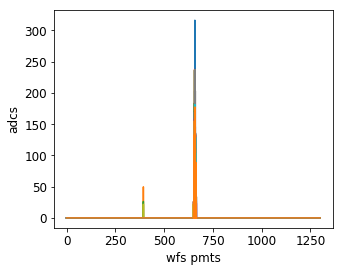

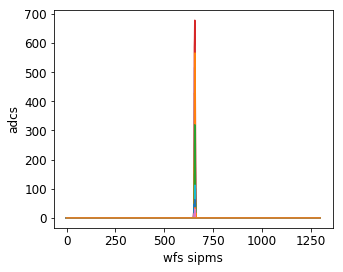

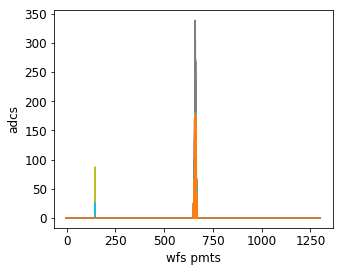

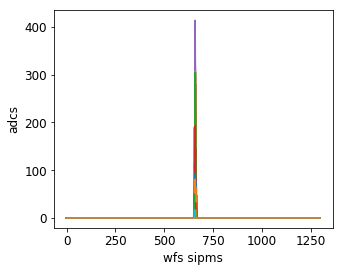

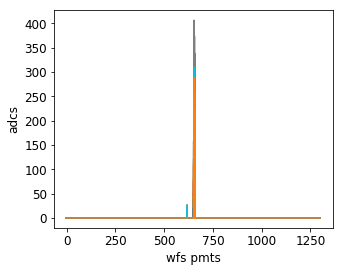

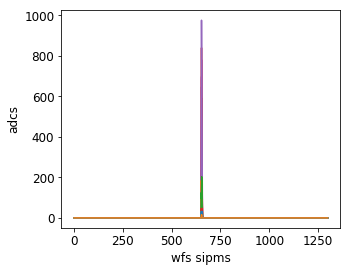

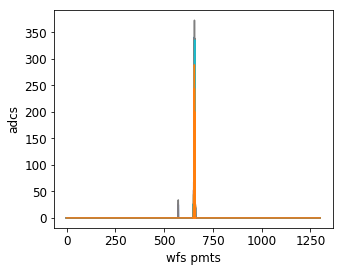

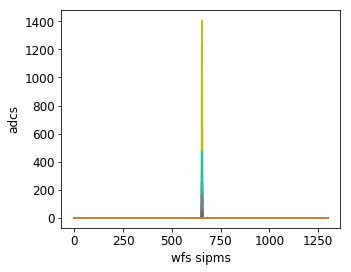

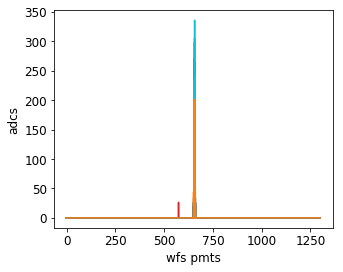

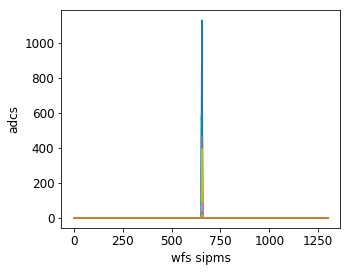

In [14]:
plot = True
nsize = 5
dt = 0
for i in range(nsize):
    evt, hits = next(it)
    ti = time.time()
    wfs_pmts, wfs_sipms = generate_wfs(hits)
    dt += (time.time() - ti)
    if (plot): dsplot.plot_simulate_wfs(dsim, wfs_pmts, wfs_sipms)
print('time ', dt/nsize)